In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

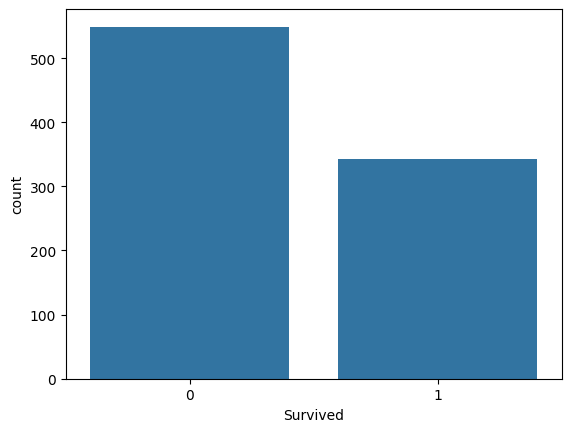

In [48]:
sns.countplot(x = 'Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

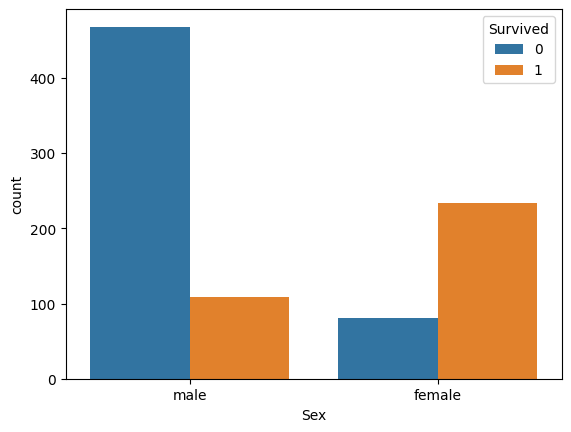

In [52]:
sns.countplot(x = 'Sex', hue = 'Survived', data = data)

<Axes: xlabel='Pclass', ylabel='count'>

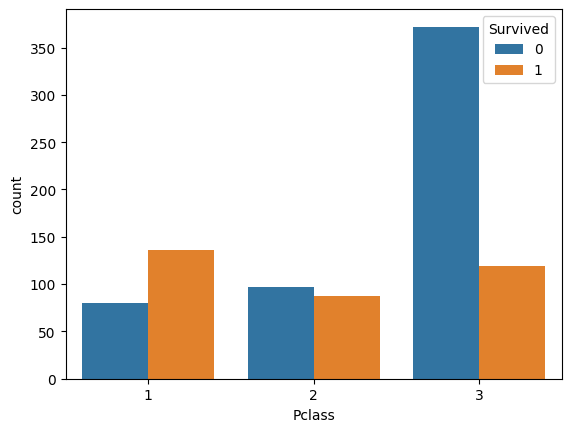

In [50]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

<Axes: xlabel='Age', ylabel='Count'>

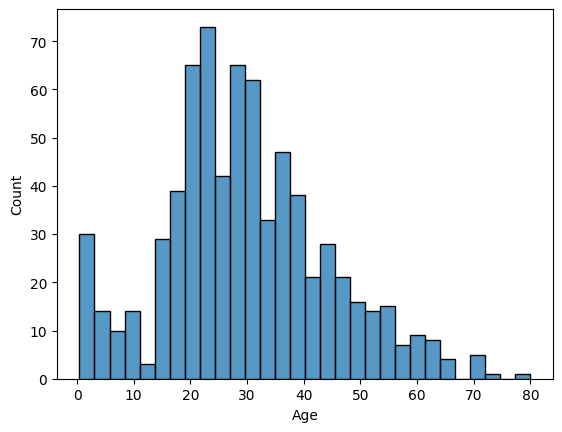

In [51]:
sns.histplot(data['Age'], bins = 30)

In [53]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
data['Age'].fillna(data['Age'].median(), inplace = True)
data['Embarked'].fillna(data['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [55]:
data = data.drop(columns = ['Cabin', 'Ticket', 'Name'])

In [56]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'], drop_first = True)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('Survived', axis = 1))
scaled_features = scaler.transform(data.drop('Survived', axis = 1))
scaled_data = pd.DataFrame(scaled_features, columns = data.columns[:-1])

In [58]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, ypred))
print(accuracy_score(y_test, ypred))
print(confusion_matrix(y_test, ypred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       154
           1       0.88      0.69      0.77       114

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.82       268

0.8283582089552238
[[143  11]
 [ 35  79]]
